In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats

### Uniform distribution 

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10


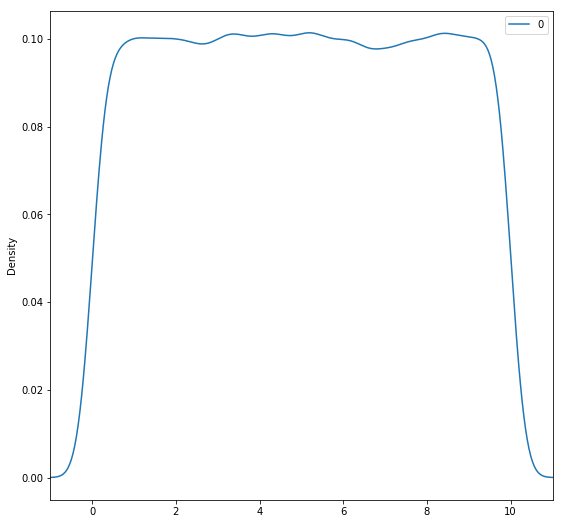

In [3]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

In [4]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

In [5]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

In [6]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


### Generating Random Numbers and Setting The Seed


In [7]:
import random

In [8]:
random.randint(0,10)     # Get a random integer in the specified range

4

In [9]:
random.choice([2,4,6,9]) # Get a random element from a sequence

6

In [10]:
random.random()          # Get a real number between 0 and 1

0.053000861464999494

In [11]:
random.uniform(0,10)     # Get a real in the specified range

4.327588917499443

In [12]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


### Normal distribution 

In [13]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.4,0.03,'0.159')

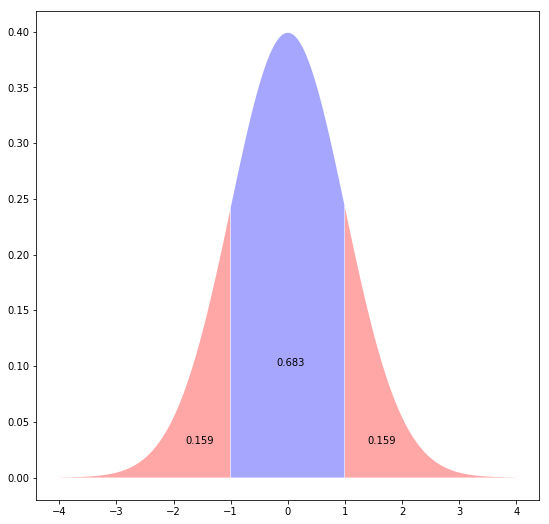

In [14]:
# Plot normal distribution areas

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

### Binomial distribution

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   7  95  442  1114  2059  2514  2053  1173  429  105   9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dc810b8>]],
      dtype=object)

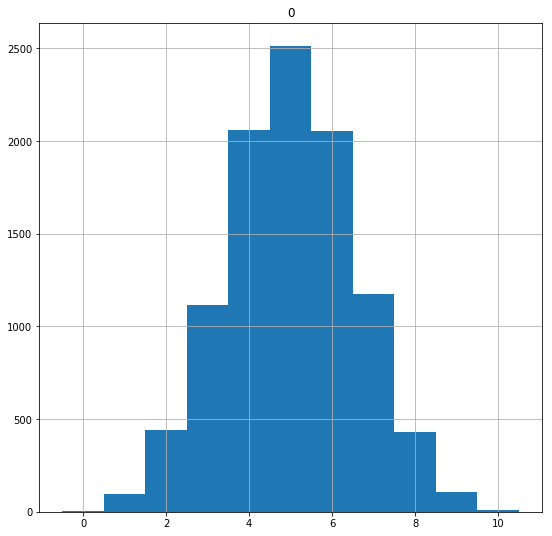

In [15]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   2   8  54  254  885  1948  3091  2632  1126


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dcf6320>]],
      dtype=object)

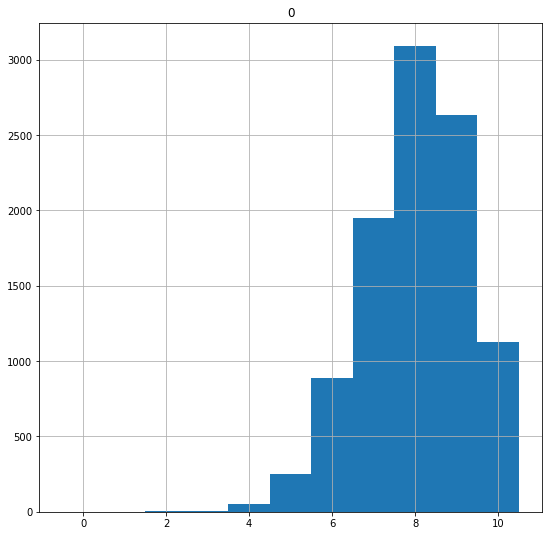

In [16]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [17]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

In [18]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000003

In [19]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5


0.24609375000000025

In [20]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.301989888

### Geometrical and Exponential distributions

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  15  16
row_0                                                                      
counts  5046  2481  1201  618  300  174  87  47  21  15   4   2   2   1   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de99cf8>]],
      dtype=object)

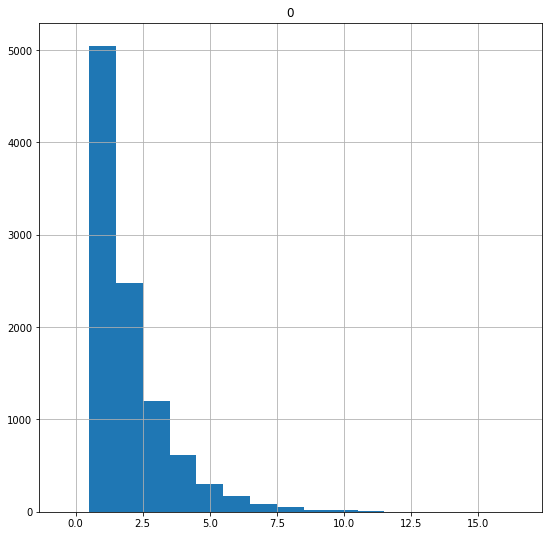

In [21]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

In [22]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [23]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [24]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Text(1.5,0.08,'0.368')

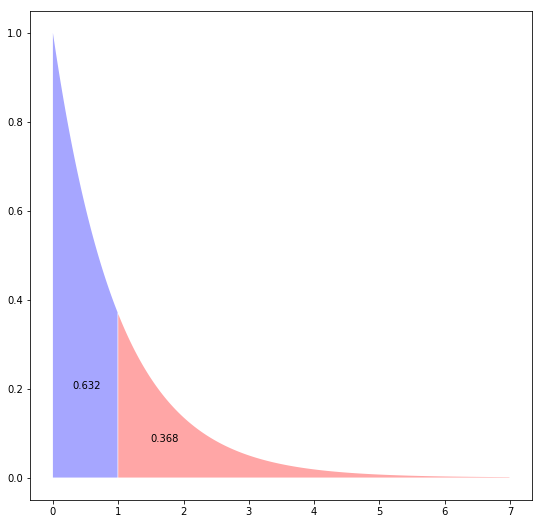

In [25]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3))

### Poisson distribution 

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3641  3749  1839  601  142  25  3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e1bca58>]],
      dtype=object)

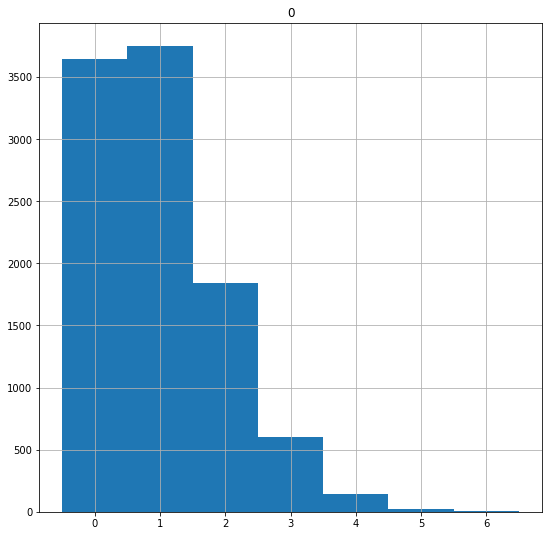

In [26]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1)

col_0   1   2   3    4    5    6    7     8     9     10 ...   14   15   16  \
row_0                                                    ...                  
counts   4  28  72  209  379  647  923  1209  1209  1255 ...  497  340  222   

col_0    17  18  19  20  21  22  23  
row_0                                
counts  135  74  36  15   6   2   1  

[1 rows x 23 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3473c8>]],
      dtype=object)

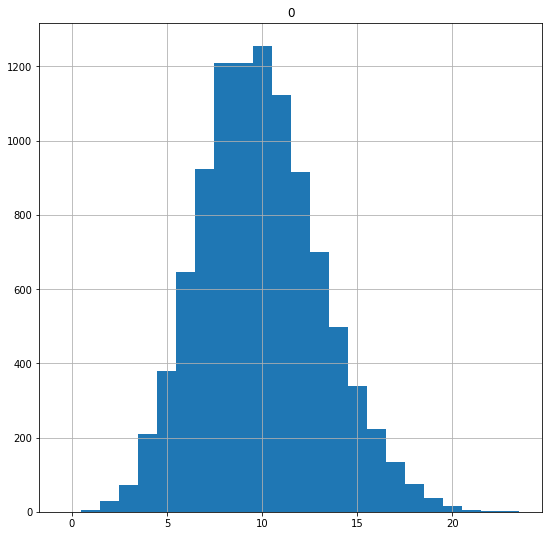

In [27]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1)

In [28]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [29]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

## Simple Monte Carlo - Generating from an Exponential distribution

In [42]:
def inverseFunction(lm, n):
    u = stats.uniform.rvs(size = n, loc = 0, scale = 1)
    return -lm * np.log(1 - u)

(array([503., 255., 111.,  69.,  24.,  22.,   6.,   5.,   3.,   2.]),
 array([1.40977854e-04, 6.88017170e-02, 1.37462456e-01, 2.06123195e-01,
        2.74783935e-01, 3.43444674e-01, 4.12105413e-01, 4.80766152e-01,
        5.49426891e-01, 6.18087630e-01, 6.86748370e-01]),
 <a list of 10 Patch objects>)

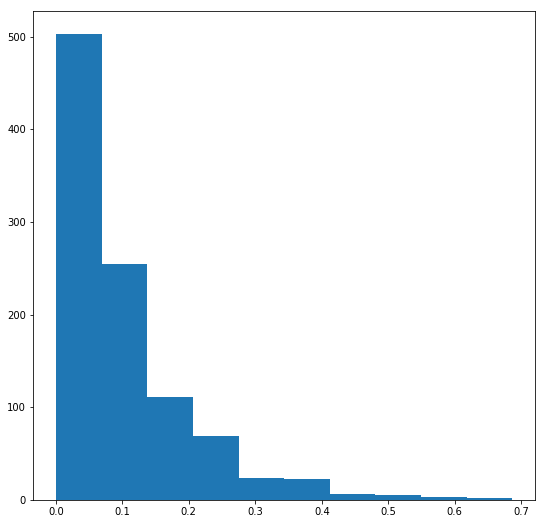

In [46]:
plt.hist(inverseFunction(0.1, 1000))

## Acceptance-Rejection Sampling 

In [47]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()


def p(x):
    return stats.norm.pdf(x, loc=30, scale=10) + stats.norm.pdf(x, loc=80, scale=20)


def q(x):
    return stats.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
alpha = max(p(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, alpha*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

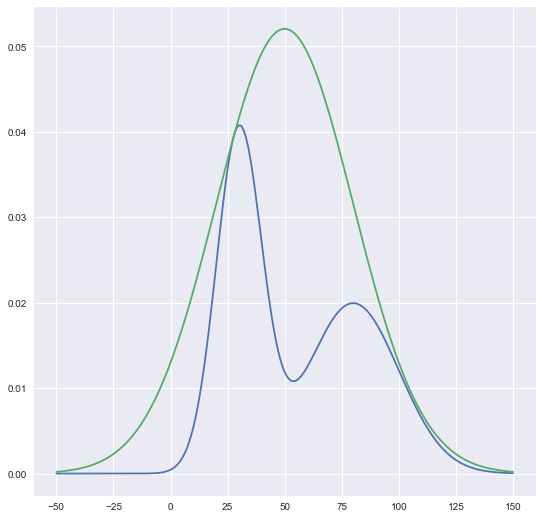

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


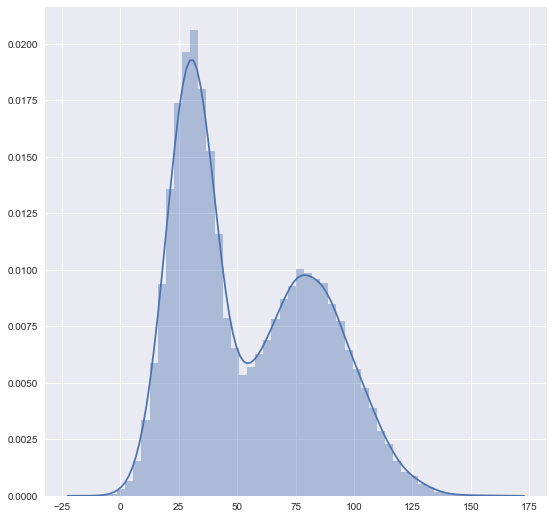

In [48]:
plt.plot(x, p(x))
plt.plot(x, alpha*q(x))
plt.show()

s = rejection_sampling(iter=100000)
sns.distplot(s)

### Empirical distribution function 

In [72]:
data = [101, 118, 121, 103, 142, 111, 119, 122, 128, 112, 117,157]

def ecdf_function(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [73]:
ecdf_function(data)

(array([101, 103, 111, 112, 117, 118, 119, 121, 122, 128, 142, 157]),
 array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
        0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
        0.91666667, 1.        ]))

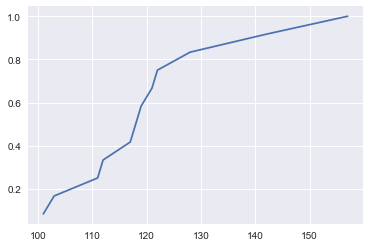

In [74]:
plt.plot(ecdf_function(data)[0], ecdf_function(data)[1])

## Non parametrical confidence bounds

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

def epsilon(n, alpha=0.05):
    return np.sqrt(1. / (2. * n) * np.log(2. / alpha))

def plot_dist(rv, n, name, low, high, pltnum=111):
    samples = rv.rvs(n)
    ecdf = ECDF(samples)

    x = np.linspace(low, high, 10000)
    eps = epsilon(n=len(samples))
    df = pd.DataFrame(ecdf(x), index=x)
    df['ecdf'] = ecdf(x)
    df['cdf'] = rv.cdf(x)
    
    plt.subplot(pltnum)
    df['ecdf'].plot(label='ECDF')
    df['cdf'].plot(label='CDF', style='r--')
    df['upper'] = pd.Series(ecdf(x), index=x).apply(lambda x: min(x + eps, 1.))
    df['lower'] = pd.Series(ecdf(x), index=x).apply(lambda x: max(x - eps, 0.))
    plt.fill_between(x, df['upper'], df['lower'], 
                     alpha=0.1, label='Confidence Band')
    plt.legend(loc='best')
    plt.title('%s ECDF (n=%d)' % (name, len(samples)))

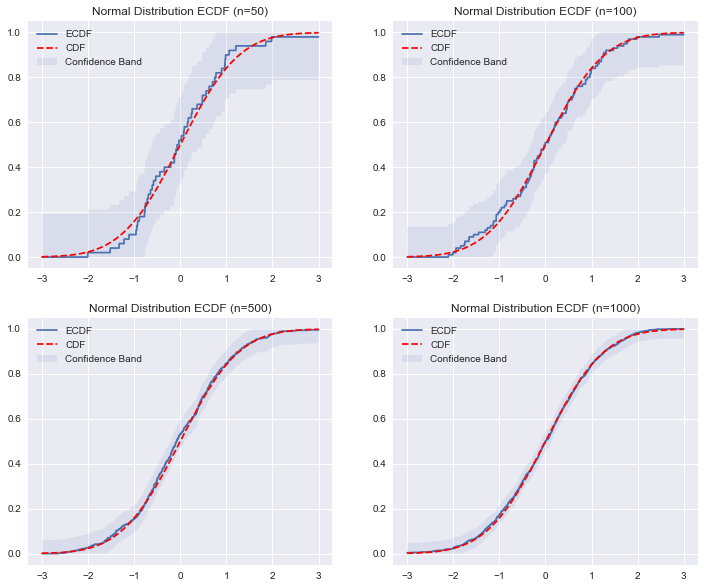

In [79]:
# Plot a normal ECDF and confidence bands
plt.figure(1, figsize=(12, 10))
norm = stats.norm(0., 1.)
plot_dist(norm, 50, name='Normal Distribution', low=-3, high=3, pltnum=221)
plot_dist(norm, 100, name='Normal Distribution', low=-3, high=3, pltnum=222)
plot_dist(norm, 500, name='Normal Distribution', low=-3, high=3, pltnum=223)
plot_dist(norm, 1000, name='Normal Distribution', low=-3, high=3, pltnum=224)
plt.show()

## Non parametrical confidence intervals 

In [91]:
from statsmodels.distributions.empirical_distribution import ECDF

data = [101, 118, 121, 103, 142, 111, 119, 122, 128, 112, 117,157]

z = stats.norm.ppf(0.95)

ecdf_data = ECDF(data)

ecdf_data(118)

0.49999999999999994

In [92]:
(ecdf_data(118) - z*np.sqrt((ecdf_data(118) * (1 - ecdf_data(118) ) / len(data)) ), 
 ecdf_data(118) + z*np.sqrt((ecdf_data(118) * (1 - ecdf_data(118) ) / len(data)) ) )

(0.26258582892550875, 0.7374141710744911)